# **Statistical Analysis of Data**




# **Preparing data for this exercise**

For this exercise, we will use a mix of fictious survey data from a WidgetCorp employee engagement survey.

All widgetcorp employees were asked to rate the degree to which they agree with the following statements:

1. I am proud to work for WidgetCorp.
2. I would recommend WidgetCorp as a great place to work.
3. I see myself still working at WidgetCorp in two years' time.
4. Management at WidgetCorp knows what it takes to go above and beyond in the marketplace.
5. The leaders at WidgetCorp have communicated a vision that motivates me to do my best at work.
6. I have access to the resources I need to do my job well,
7. I know what I need to do to be successful in my role.
8. I believe there are good career opportunities for me at WidgetCorp. 

On a scale from 1 to 5 where: 

- 1 = Strongly Disagree
- 2 = Disagree
- 3 = Neutral 
- 4 = Agree
- 5 = Strongly Agree


#### Let's prepare our environment and look at our data:

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#PLEASE make sure you have mounted your google drive by clicking on the folder icon on the left hand side of your screen (skinny menu column with icons only),
#and then clicking on the google drive folder if you cannot see the word "drive" in the list of folders that appear

In [ ]:
hcdata = pd.read_csv('drive/My Drive/Python for HCM Datasets from Lessons/combined_data_for_analysis.csv')


surveydata= pd.read_csv('https://raw.githubusercontent.com/bvoorhees/code_and_data_for_the_people_analytics_enthusiast/master/employee_listening/data/survey.csv')

In [ ]:
hcdata.head()

,Employee ID,First Name,Last Name,Email Address,Department,Job Level,Tenure,Pay Rate,Gender,Ethnicity,Tenure Date,Report Effective Date,Status,Annual Salary,Education,Tenure_Today
0,427,Erik,Sanders,erik.sanders@widgetcorp.com,Complaince,Associate,4.894980,49.94,Male,4,2014-02-07,2018-12-31,Active,103875.2,Bachelor,6.79
1,848,Christina,Blaze,christina.blaze@widgetcorp.com,Complaince,VP,7.400493,48.62,Female,1,2011-08-06,2018-12-31,Active,101129.6,Some College,9.30
2,63,Drue,Hightower,drue.hightower@widgetcorp.com,Complaince,Associate,2.728467,37.87,Male,3,2016-04-08,2018-12-31,Active,78769.6,High School Diploma,4.62
3,305,Edgar,Lopez,edgar.lopez@widgetcorp.com,Complaince,Analyst,4.324053,37.33,Male,4,2014-09-03,2018-12-31,Active,77646.4,Some College,6.22
4,513,Marianne,Rem,marianne.rem@widgetcorp.com,Complaince,Associate,5.307411,34.07,Female,2,2013-09-09,2018-12-31,Active,70865.6,Master,7.20


In [ ]:
surveydata.head()

,Employee Number,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,9,4,4,3,4,3,3,1,2
1,47,5,5,5,5,3,5,1,1
2,70,4,5,2,3,4,3,2,2
3,292,5,5,5,5,3,3,2,3
4,324,3,3,3,4,4,2,2,3


## Combining Survey data with headcount data

In order to do comparison over groups, we'll need to marry the headcount and survey data. 

**Question**: How should we do this, given we know that surveys are often not filled out by everyone?


In [ ]:
surveydata=surveydata.rename(columns={'Employee Number':'Employee ID'},)

surveydata=pd.merge(surveydata,hcdata,on='Employee ID')

# **Testing for differences between and across group**

How can we be confident that two or more groups of employees are different from one another?

Visualizations only tell us so much in terms of how different to groups of employees. Our eyes can only see certain nuances in the data using tools like boxplots and histograms.

Let's take the following example of Widgetcorp employees responding to the first question on the survey "I am proud to work for WidgetCorp"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb04f9ce5c0>,
      dtype=object)

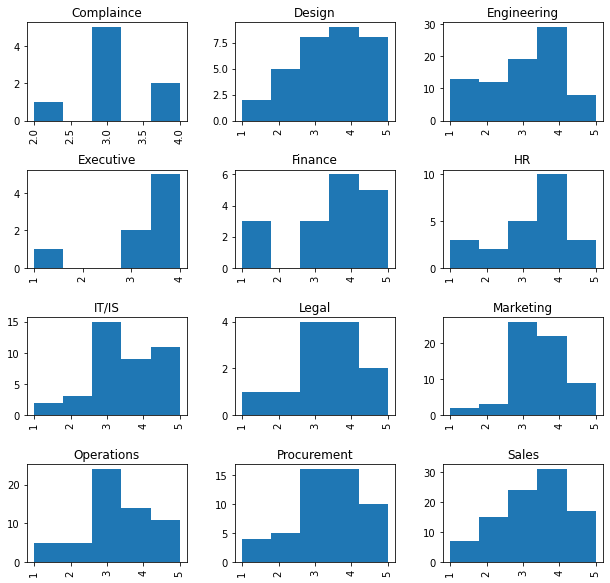

In [ ]:
surveydata.hist(column="Q1", by="Department", bins=5,figsize=(10,10))

In [ ]:
#let's take a look at the means for the plots above for the first survey question
surveydata.groupby("Department")["Q1"].mean()

Department
Complaince     3.125000
Design         3.500000
Engineering    3.086420
Executive      3.375000
Finance        3.588235
HR             3.347826
IT/IS          3.600000
Legal          3.416667
Marketing      3.532258
Operations     3.355932
Procurement    3.450980
Sales          3.382979
Name: Q1, dtype: float64

**Question**: How can we figure out whether these means are different? 

For example, it looks like Engineering is much lower than Finance in terms of their pride working for WidgetCorp. How can we be sure that this isn't just a few people throwing things off?

## **Numeric variables: T-Tests**

T-Tests compares differences in a continuous (a kind of numeric) variable among 2 categories.

![](http://socialresearchmethods.net/kb/Assets/images/stat_t3.gif)

Types
- Independent (One-way or Two-way)
- Paired

Assumptions:
- Normal Distribution of Data: The means of the two populations being compared should follow normal distributions.
- Equality of Variance:  The two populations being compared should have the same variance.
- Scale of Measurement:  Data collected follows a continuous scale.



In [ ]:
# Let's generate two different dataframes representing two different groups scores
engineering_q1_responses = surveydata.loc[surveydata['Department']=='Engineering']['Q1']
finance_q1_responses = surveydata.loc[surveydata['Department']=='Finance']['Q1']
engineering_q1_responses.head()

40    1
41    2
42    4
43    4
44    2
Name: Q1, dtype: int64

In [ ]:
# now, let's run the t-test. We'll need the stats module from the scipy library for this
from scipy import stats

stats.ttest_ind(engineering_q1_responses, finance_q1_responses)

Ttest_indResult(statistic=-1.4731903044866312, pvalue=0.14397106784465105)

We would fail to reject the hypothesis that the two means are the same. *Meaning that we don't see a difference between Engineering and Finance's resposne to this question*

## **Numeric variables: ANOVA**

Analysis of Variance (ANOVA) compares differences in a continuous (a kind of numeric) variable among 2 or more categories.

Types of hypotheses ANOVA tests:
- One-Way: Are there differences in survey responses by department? 
- Two-Way: Are there differences in review length by department AND by job level?

Assumptions:
- Normal Distribution of Data: The means of the two populations being compared should follow normal distributions.
- Equality of Variance:  The two populations being compared should have the same variance.
- Scale of Measurement:  Data collected follows a continuous scale.


We're going to use the `statsmodel` API to calculate ANOVAs.



In [ ]:
  import statsmodels.api as sm
  from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First we're going to test whether the ANOVA on Rating gives us the same result as the t-test

In [ ]:
#since we compared fianance and engineering above, we'll do the same here
check_ttest_data=surveydata.loc[surveydata['Department'].isin(['Finance','Engineering'])]

# We first define the formula. Here we are saying that Q1 differs by Department.

formula = 'Q1 ~ Department'
model = ols(formula, data=check_ttest_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                sum_sq    df        F    PR(>F)
Department    3.538312   1.0  2.17029  0.143971
Residual    156.512709  96.0      NaN       NaN


The p-value of this is the same as the p-value from the t-test!

In [ ]:
# Now let's see if there is a difference between departments as a whole.
formula = 'Q1 ~ Department'
model = ols(formula, data=surveydata).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
Department   12.397181   11.0  0.845978  0.59397
Residual    632.797891  475.0       NaN      NaN


This is **not** statistically significant (Pr > 0.05)!

We can surmise that there is not a meaningful difference between departments in terms of employee responses to Q1 (Pride in working for WidgetCorp).

Additional details on running ANOVAs and post-hoc analysis in Python can be [found here](https://reneshbedre.github.io/blog/anova.html).

## **Categorical Variables: Chi-squared Tests**

Tests whether the distribution of two groups are not the same. 

Assumptions:
- Data is binary or categorical: Each datapoint can belong to only one class.
- Large sample size.
- Datapoints are independent of eachother.
- Large cell counts: A common rule is 5 or more in all cells of a 2-by-2 table, and 5 or more in 80% of cells in larger tables, but no cells with zero expected count.

**Note**: The data does not have to have a normal distribution.

In [ ]:
#first, let's reclassify our responses to questions as "favorable" and "not favorable"

surveydata['Q1_favorable']=surveydata['Q1'].map({5:'favorable',
                                                 4:'favorable',
                                                 3:'not favorable',
                                                 2:'not favorable',
                                                 1:'not favorable'})

cross_tab = pd.crosstab(surveydata["Department"], surveydata["Q1_favorable"])
cross_tab

Q1_favorable,favorable,not favorable
Department,,
Complaince,2,6
Design,17,15
Engineering,37,44
Executive,5,3
Finance,11,6
HR,13,10
IT/IS,20,20
Legal,6,6
Marketing,31,31


In [ ]:
#now we can run the chi-square test 

chi2, p, deg_f, expected = stats.chi2_contingency(cross_tab)

pd.DataFrame({'measure':['chi2_value','p','degrees_of_freedom'],'value':[chi2,p,deg_f]})

,measure,value
0,chi2_value,6.476221
1,p,0.839778
2,degrees_of_freedom,11.000000


No surpise (based on what we saw in the ANOVA analysis), this is also **not** statistically significant (Pr > 0.05)!

# **Correlations**

How do two variables relate to one another? When one goes up, does the other also go up? Or does the other go down? Or is there no discernable pattern? This is what correlation is all about. 

Is tenure related to how employees answered "I see myself still working at WidgetCorp in two years' time"? 

Let's run a correlation to see.


In [ ]:
# to do this, we can use the pearsonr() function in scipy.stats
r, p = stats.pearsonr(surveydata['Tenure'],surveydata['Q3'])

#we are given two 

pd.DataFrame({'stat':['Correlation Coefficient','P Value'],'value':[r,p]})


,stat,value
0,Correlation Coefficient,0.159591
1,P Value,0.000407


So it seems that there is a positive, though weak, correlation, between tenure and people's outlook on staying with WidgetCorp over the next two years. 

The P value is small (below .05), so we are confident in this claim.



### **Vizualizing correlations**

When we have many different variables to examine relationships between, sometimes it's easier to visualize correlations first before we dive deeper and run correlation calculations so we can also extract a P value. 

Here is an example:

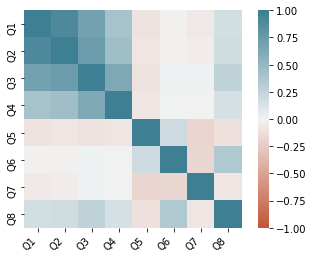

In [ ]:
import seaborn as sns #we'll import the seaborn library to help us visualize this data

corr = surveydata[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']].corr() #calculate correlations betweeen all survey questions

ax = sns.heatmap( #create a heatmap object called ax
    corr, #data we want to map
    vmin=-1, vmax=1, center=0,  #parameters for possible value of each cell
    cmap=sns.diverging_palette(20, 220, n=200), #coloring for cells
    square=True 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# **Modeling Data**

### **What is a model?**

A model is a simple representation of what's actually happening in the real world. Think of the toy diorama you may have made in school-- it was a simplification of the real world meant to get others to understand how things work. 


## **Regressions**

Regressions are one of the most common statistical model types employed in people analytics projects.

Regression helps us understand the relationship between changes in two or more variables (known as independent variables, features, explanatory variables, or inputs) and the change of another, single variable (known as a dependent variable or response varaible). 

Generally, regression takes the following equation form:

![](https://www.c-sharpcorner.com/article/linear-regression2/Images/f_MLR.png) 

### **Regression types**

Regression is a very nuanced statistical learning tool, with entire fields (bioinformatics, psychometrics, econometrics) dedicated or having developed specific types of regression depending on the problem being analyzed.


---

Generally speaking, however, there are two broad sorts of regression employed in people analytics. 


*  **Linear regressions** model the relationship between input variables to a **continuous output variable**. This is usually done via a  *Least Squares* approach. 

* In contrast, **logistic regressions** model the probability of input variables resulting in a particular **binary outcome**. These are used in classification problems. This is usually perfromed via a *logistic regression*


### **An important note on assumptions in regression**

We will go through a very simplified overview of regression in Python, and not focus so much on the statistical assumptions of running such models. 

***It is incredibly important*** that you understand the assumptions of these models and that you follow them as you make models of your data, as violoating them can cause you to draw (sometimes gross) misinterpretations from your data. 

The assumptions of linear and logistic regression are different (though there are commonalities). A great video that overviews these assumptions for [linear regression are here](https://youtu.be/hVe2F9krrWk), and [logistic regression are here](https://youtu.be/nTjK4JdmZe4). Note these are overviews, and this topic is a bit complex (thereare entire courses dedicated to regression analysis and statistical inference at universities and online alike). 

### **Linear Regression**

Remember our scatter plot from Lecture 2a on the relationship between tenure and salary? 

You may have thought of drawing a straight (linear!) line through that data to generalize the relationship between those two variables--or more specifically the impact of tenure on annual salary. 

Let's do that. 

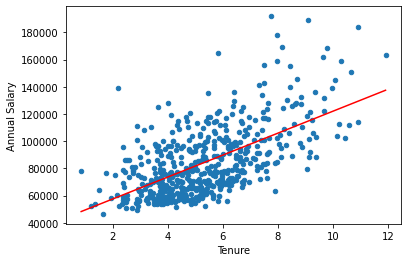

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

hcdata.plot.scatter(x='Tenure', y='Annual Salary') #for this kind of plot, we need to put the .plot method first

#now add the best fit line
plt.plot(np.unique(hcdata['Tenure']), 
         np.poly1d(np.polyfit(hcdata['Tenure'], hcdata['Annual Salary'], 1))(np.unique(hcdata['Tenure'])),
         color='r') 


It appears that everyone generally starts out with a \$50k annual salary in WidgetCorp, and each year that number grows by about $10k on average. 


---


But what if we want a specific number?

And how statistically reliable the relationship is between the two?

---

Let's run a regression to find out. 

In [ ]:
# let's run the regression using the statsmodels library
import statsmodels.api as sm 

#make our response variable column
y = hcdata["Annual Salary"]

#make our explanatory variable columns
x = hcdata["Tenure"]
x = sm.add_constant(x) #like the chart above, we need to make an intercept (or 'constant')

#now make (fit) the model
model_tenure = sm.OLS(y,x).fit()
print(model_tenure.summary())


                            OLS Regression Results                            
Dep. Variable:          Annual Salary   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     292.9
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.76e-52
Time:                        15:53:39   Log-Likelihood:                -5963.0
No. Observations:                 526   AIC:                         1.193e+04
Df Residuals:                     524   BIC:                         1.194e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.142e+04   2674.135     15.490      0.0

#### **Interpreting  Results**

- **Adjusted R-squared** reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. Here we have an R-Squared value of .359 - which in people analytics is typically strong result. 
- **coef** shows the slope coefficients for each of the variables in our model:
  - **const** coefficient is your Y-intercept. It means that when tenure is zero, salary is \$41.4k.
  - **Tenure** coefficient represents the change in the output "Anual Salary" due to a change of one unit (which in this case is a year) in the Tenure(when everything else held constant). In this case, a one year increase in salary results in a $8056 increase in salary, on average. 
- **std err** reflects the level of accuracy of the coefficients. The lower it is (relative to the coefficient), the higher is the level of accuracy
- **P >|t|** is your p-value. A p-value of less than 0.05 is considered to be statistically significant. Here, tenure is statistically significant (P<.05).
- **Confidence Interval** represents the range in which our coefficients are likely to fall (with a likelihood of 95%, as shown in the right two columns in our regression output coefficient table). 

Surely there are other things that can explain differences in annual salary? How about Department?

In [ ]:
x = hcdata[["Tenure", "Department"]]

# We convert the "Department" column to a set of dummy (yes or no, or 0 or 1) varaiables
x = pd.get_dummies(x, columns=["Department"])
x = sm.add_constant(x)

x=x.drop(columns='Department_Complaince') # we must drop one category for mathematical purposes (multicolinearity)

x.tail()  


,const,Tenure,Department_Design,Department_Engineering,Department_Executive,Department_Finance,Department_HR,Department_IT/IS,Department_Legal,Department_Marketing,Department_Operations,Department_Procurement,Department_Sales
521,1.0,4.127392,0,0,0,0,0,0,0,0,0,0,1
522,1.0,3.837935,0,0,0,0,0,0,0,0,0,0,1
523,1.0,2.913269,0,0,0,0,0,0,0,0,0,0,1
524,1.0,2.687647,0,0,0,0,0,0,0,0,0,0,1
525,1.0,2.486100,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
model_tenure_department = sm.OLS(y,x).fit()

print(model_tenure_department.summary())


                            OLS Regression Results                            
Dep. Variable:          Annual Salary   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     34.57
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.77e-58
Time:                        16:00:59   Log-Likelihood:                -5924.0
No. Observations:                 526   AIC:                         1.187e+04
Df Residuals:                     513   BIC:                         1.193e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.83

In [ ]:
#let's check that adding the department dummies to the model was a good choice using an ANOVA test

from statsmodels.stats.anova import anova_lm
anovaResults = anova_lm(model_tenure, model_tenure_department)
print(anovaResults) # it appears that this was a good choice


   df_resid           ssr  df_diff       ss_diff         F        Pr(>F)
0     524.0  2.164354e+11      0.0           NaN       NaN           NaN
1     513.0  1.865590e+11     11.0  2.987636e+10  7.468546  5.947382e-12


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


#### **Making Predictions**

Now that we know how one or more variables affects salary-- why don't we plug in some numbers to the equation above, and get a prediction?

In [ ]:
#and of course, let's make some predictions with the data

#data to predict with first model we made above
x1 = hcdata["Tenure"]
x1 = sm.add_constant(x1)

#data to predict with second model we made
x2 = hcdata[["Tenure", "Department"]]
x2 = pd.get_dummies(x2, columns=["Department"])
x2 = sm.add_constant(x2)
x2=x2.drop(columns='Department_Complaince') # we must drop one category for mathematical purposes (multicolinearity)

#make a dataframe with everything put together (Actual and predicted data)
employee_predictions= pd.DataFrame({'employee_id':hcdata['Employee ID'],
              'tenure':hcdata['Tenure'],
              'department':hcdata['Department'],
              'actual salary':hcdata['Annual Salary'],
              'predicted salary tenure only model':model_tenure.predict(x1),
              'predicted salary tenure + department model':model_tenure_department.predict(x2)})

employee_predictions


,employee_id,tenure,department,actual salary,predicted salary tenure only model,predicted salary tenure + department model
0,427,4.894980,Complaince,103875.2,80860.951442,78082.159724
1,848,7.400493,Complaince,101129.6,101047.312801,98402.399102
2,63,2.728467,Complaince,78769.6,63405.838407,60511.282590
3,305,4.324053,Complaince,77646.4,76261.114366,73451.816057
4,513,5.307411,Complaince,70865.6,84183.816682,81427.062547
...,...,...,...,...,...,...
521,274,4.127392,Sales,55494.4,74676.663172,75498.101465
522,213,3.837935,Sales,53456.0,72344.575890,73150.547541
523,81,2.913269,Sales,52582.4,64894.746699,65651.310318
524,60,2.687647,Sales,51230.4,63076.956457,63821.464305


### **Logistic Regression**

Now let's work to model the relationship between a binary (yes/no, true/false, 0/1, etc.) dependent variable and one or more dependent variables. 

---

Let's look at the relationship between `months_since_last_promotion` and `voluntary_attrite` in a new (fake) dataset, where `voluntary_attrite` is a binary variable (left=1, stayed=0)

In [ ]:
#first, let's create our data
attrition_data=pd.DataFrame({'employee_number':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                         'voluntary_attrite':[1,0,0,0,1,1,0,1,0,0,0,0,0,0,1],
                        'months_since_last_promotion':[13,12,1,35,35,44,18,33,24,7,12,16,17,1,42]})

attrition_data.head(15)

,employee_number,voluntary_attrite,months_since_last_promotion
0,1,1,13
1,2,0,12
2,3,0,1
3,4,0,35
4,5,1,35
5,6,1,44
6,7,0,18
7,8,1,33
8,9,0,24
9,10,0,7


In [ ]:
# now let's make separate series for our explanatory variable (months since last promotion)
# and our dependent variable (whether or not someone voluntarily attrited)

x=attrition_data['months_since_last_promotion']
x=sm.add_constant(x)

y=attrition_data['voluntary_attrite']

#now let's fit our model

logistic_model=sm.Logit(y,x).fit()
print(logistic_model.summary())


Optimization terminated successfully.
         Current function value: 0.386306
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      voluntary_attrite   No. Observations:                   15
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Dec 2020   Pseudo R-squ.:                  0.3931
Time:                        16:11:54   Log-Likelihood:                -5.7946
converged:                       True   LL-Null:                       -9.5477
Covariance Type:            nonrobust   LLR p-value:                  0.006149
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.0824      1.894     -2.156      0.031   

#### **Interpreting Results**

Interpreting results of logistic regression is somewhat similar to linear regression in terms of standard errors and p-values. 

HOWEVER, it is different than linear regression in two key areas

1. Coefficients: `coef` colmn is in *log odds* form. This is due to the function assumed in logistic regression (more on the technical details [here](https://www.youtube.com/watch?v=yIYKR4sgzI8)). 
This means that the coefficent you see is the impact of a one unit change on:

  $ log(\frac{p_{attrite}}{(1-p_{attrite})}) $

  ...meaning that the coefficient for `months_since_last_promotion` (.1422) represents how one month increase in months_since_last_promotion increases that log ratio of attrition. More on this below.

2.  Error: while we have a [pseudo r-squared](https://www.healthcare-economist.com/2016/12/28/what-is-a-pseudo-r-squared/) as one way to measure error. This is already included in the output above. We can also do it by looking at how observations become misclassfied by the model, mainly by looking at the confusion matrix: 
 
![](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)
[Source](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

---

In terms of coefficients: We probably care about regular odds a bit more, so we need to do a little bit of extra work to say how much of an increase of one month since last promotion changes odds of attrition.


In [ ]:
# to convert the coefficients from log-odd form to probability form, we must conver them to odds
import numpy as np # we need the numpy library to take the exponential of the coefficients

#first, let's 'de-log' the coefficients

np.exp(logistic_model.params)


const                          0.016867
months_since_last_promotion    1.152790
dtype: float64

So here we see that a one month increase since the previous promotion raises the odds of attrition by about 15%.

---

But how do we know what this means for **probablity** of attrition?

We take our equation given to us by the regression output, and plug in a number for months since promotion. 

So, let's say we have someone with 30 months since their previous promotion:

$ log(Odds_{attrite})=-4.0824+ 30 * 0.1422 = 0.1836  $

$ Odds_{attrite}=e^{0.1836} = 1.201 $

and recall that $Odds = \frac{p}{1-p}$ where $ p $ is probability. 

So, with a little bit of algebra, we can get $p$ using $ \frac{1.201}{1+1.201}  = .545 $ probability that this person (with 30 months since their last promotion will attrite).  

In [ ]:
#Or more simply, we can just generate probabilities for the entire dataset by using the predict function:

employee_predictions= pd.DataFrame({'employee_id':attrition_data['employee_number'],
              'months_since_last_promotion':attrition_data['months_since_last_promotion'],
              'probability of leaving from logistic regression model':logistic_model.predict(x),
              'model predicted outcome':[int(x>=.5) for x in logistic_model.predict(x)],
              'actual attrition outcome':attrition_data['voluntary_attrite']})

employee_predictions




,employee_id,months_since_last_promotion,probability of leaving from logistic regression model,model predicted outcome,actual attrition outcome
0,1,13,0.096742,0,1
1,2,12,0.085010,0,0
2,3,1,0.019074,0,0
3,4,35,0.709736,1,0
4,5,35,0.709736,1,1
5,6,44,0.897869,1,1
6,7,18,0.179014,0,0
7,8,33,0.647880,1,1
8,9,24,0.338512,0,0
9,10,7,0.043644,0,0


In [ ]:
#or in a confusion matrix output:
from sklearn import metrics

cm=metrics.confusion_matrix(employee_predictions['actual attrition outcome'], employee_predictions['model predicted outcome'])
print(cm) #Y axis is actual outcome; X- axis is predicted outcome

{'specificity': cm[0,0]/(cm[0,0]+cm[0,1]),
 'sensitivity':cm[1,1]/(cm[1,0]+cm[1,1]),
 'accuracy':(cm[0,0]+cm[1,1])/(sum(cm[0]+cm[1]))}

[[9 1]
 [1 4]]


{'accuracy': 0.8666666666666667, 'sensitivity': 0.8, 'specificity': 0.9}

## **Clustering / Segmentation**

What if we want to discover groups of employees based on a variety of information we have about them? 

For example, can we identify groups of employees based off of their responses to questions on a survey? 

Traditionally, we may have sifted through lots of data, and used business logic to define groups of employees (e.g. scored high in engagement dimensions, but low on questions related to company leadership dimensions). 

But what if we group employees together that technically shouldn't be grouped together? Or what if we want to consider many different variables at once?

Enter cluster analysis. 

---

Cluster analysis deserves its own lecture, and so for brevity, I am linking [this youtube video](https://www.youtube.com/watch?v=Ev8YbxPu_bQ) which gives a nice overview of cluster analysis. The following videos in that series cover the ***K-Means*** - which we will review here below.

Let's look in short on how to do a cluster analysis in Python using K-Means:

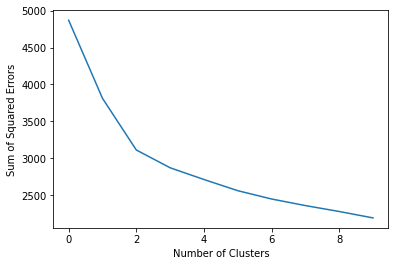

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#we'll first take out certain columns we want to make groups for into a dataframe called 'features'

features=surveydata[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Annual Salary','Tenure']]
features.index=surveydata['Employee ID'] #we'll keep employee ID as a way to mark rows (index) so we know what we're looking at later

#first, we must make all of these variables the same scale (some are in dollars, others years, others likert scale)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#now, let's discover how many clusters of employees exist in the data

sse = []
for k in range(1, 11): #test one through eleven clusters
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

#now let's look at where there is a drop off in fitness 

import matplotlib.pyplot as plt
plt.plot(sse)
plt.ylabel('Sum of Squared Errors')
plt.xlabel('Number of Clusters')
plt.show() #it appears there are 2-3  clusters of employees in this dataset

In [ ]:
#let's take a look at the features of an employees with three clusters
#first, let's fit the 3 clusters to our feature data from above
cluster_scheme_3= KMeans(n_clusters=3).fit(scaled_features)

#and let's take the cluster assignment and pass it back
features['Cluster Assignment']=cluster_scheme_3.labels_

features.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Annual Salary,Tenure,Cluster Assignment
Employee ID,,,,,,,,,,,
17,3,4,2,2,5,2,5,1,58385.6,1.949403,2
33,3,4,5,5,3,2,1,3,56513.6,2.355758,1
63,3,4,4,5,4,1,1,3,78769.6,2.728467,1
178,3,3,4,4,3,4,2,2,56014.4,3.682307,1
196,4,4,5,5,5,2,1,3,57720.0,3.765248,1


#### **Interpreting Results**

After fitting clusters to our data, interpretation is typically done by exploring data by the cluster assignments.

This can be done with a combination of exploratory data analysis (summarizing data and visualizing), and statistical analysis of the clusters (testing for differences between groups using tools like those outlined in the section above).

This can be a bit iterative, and may make us go back and respecify the number of clusters in our data, or the data we use to form the clusters. 

In [ ]:
#now let's summarize our data a bit by clustering to start to make sense of them

#we'll start with the averages of our data by cluster

import numpy as np
import random
random.seed(12345)

pd.pivot_table(features,
               values=features.columns,
               index='Cluster Assignment',
               aggfunc=[np.mean])

mean            ...                    
                    Annual Salary        Q1  ...        Q8    Tenure
Cluster Assignment                           ...                    
0                   111549.013333  3.829630  ...  4.688889  7.260551
1                    73003.171429  3.870536  ...  2.633929  4.531319
2                    76672.212500  2.062500  ...  2.507812  4.651014

[3 rows x 10 columns]

Here we observe the characteristics of the clusters:

1. Cluster `2` scores considerably lower than the other two clusters for Questions 1-4 (Company Pride and direction of management). 

2. Cluster `0` has a higher tenure and annual salary than other clusters; it also scores quite high for Question 8 (I believe there are good career opportunities for me at WidgetCorp) and Question 6 (I have access to the resources I need to do my job well at WidgetCorp). 

3. Cluster `1` scores mostly consistent with the other two groups in all survey dimensions (except possibly Q6: statisical test needed!!) and is otherwise similar to cluster `2`.  

**Now** the onus is on you to decide what the possible actions are for each cluster given what we know about them.
